In [14]:
import random
import numpy as np


In [15]:
POPULATION_SIZE = 200  # Kích thước quần thể
GENERATIONS = 200  # Số thế hệ
CROSSOVER_RATE = 0.8  # Tỷ lệ lai ghép
MUTATION_RATE = 0.02  # Tỷ lệ đột biến
TOURNAMENT_SIZE = 5

In [16]:
items = [] # Vật phẩm chứa weights và values
max_capacity = 0 # maximum capacity
fitness_history = [] # Chứa lịch sử fitness qua các thế hệ

def parse_items(weights_str, values_str):
    weights = list(map(int, weights_str.split(",")))
    values = list(map(int, values_str.split(",")))
    items = list(zip(weights, values))
    return items

def get_user_input():
    global items, max_capacity  # Khai báo biến toàn cục
    weights_str = input("Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): ")
    values_str = input("Nhập danh sách giá trị (phân tách bằng dấu phẩy): ")
    max_capacity = int(input("Maximum capacity: "))
    items = parse_items(weights_str, values_str)  # Cập nhật biến toàn cục

def get_info():
    print("\nThông tin bài toán:\n")
    stt = 1
    for weight, value in items:
        print(f"Vật phẩm {stt}: Weight = {weight}, Value = {value}")
        stt += 1
    print(f"\nMaximum capacity = {max_capacity}")

def fitness(individual):
    total_weight = sum(individual[i] * items[i][0] for i in range(len(items)))
    total_value = sum(individual[i] * items[i][1] for i in range(len(items)))
    return total_value if total_weight <= max_capacity else 0

def initialize_population(num_items):
    return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(POPULATION_SIZE)]

# Selection: Tournament Selection
def select_population(population):
    selected = []
    for _ in range(POPULATION_SIZE):
        tournament = random.sample(population, TOURNAMENT_SIZE)
        winner = max(tournament, key=lambda ind: fitness(ind))
        selected.append(winner)
    return selected

# Crossover: Multi-point Crossover
def crossover(parent1, parent2):
    points = sorted(random.sample(range(len(parent1)), k=2))
    child1, child2 = parent1[:], parent2[:]
    for i in range(points[0], points[1]):
        child1[i], child2[i] = child2[i], child1[i]
    return child1, child2

# Mutation: Gaussian Mutation
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            mutation = int(np.random.normal(loc=0.5, scale=0.5) > 0.5)  # Gaussian mutation
            individual[i] = mutation
    return individual

def genetic_algorithm():
    population = initialize_population(len(items))
    best_individual = max(population, key=lambda ind: fitness(ind))

    for gen in range(GENERATIONS):
        selected_population = select_population(population)
        
        offspring = []
        for i in range(0, len(selected_population), 2):
            if random.random() < CROSSOVER_RATE and i+1 < len(selected_population):
                child1, child2 = crossover(selected_population[i], selected_population[i+1])
                offspring.extend([child1, child2])
            else:
                offspring.extend([selected_population[i], selected_population[i+1]])

        offspring = [mutate(ind) for ind in offspring]
        
        population = offspring
        current_best = max(population, key=lambda ind: fitness(ind))
        fitness_history.append(fitness(current_best))
        
        if fitness(current_best) > fitness(best_individual):
            best_individual = current_best

    return best_individual, fitness(best_individual)

In [17]:
get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 4, Value = 2
Vật phẩm 2: Weight = 2, Value = 4
Vật phẩm 3: Weight = 20, Value = 5
Vật phẩm 4: Weight = 5, Value = 6
Vật phẩm 5: Weight = 23, Value = 8
Vật phẩm 6: Weight = 9, Value = 9
Vật phẩm 7: Weight = 14, Value = 11
Vật phẩm 8: Weight = 16, Value = 12
Vật phẩm 9: Weight = 19, Value = 10
Vật phẩm 10: Weight = 14, Value = 20
Vật phẩm 11: Weight = 14, Value = 23
Vật phẩm 12: Weight = 16, Value = 8
Vật phẩm 13: Weight = 18, Value = 4
Vật phẩm 14: Weight = 14, Value = 1
Vật phẩm 15: Weight = 10, Value = 7
Vật phẩm 16: Weight = 29, Value = 4
Vật phẩm 17: Weight = 2, Value = 4
Vật phẩm 18: Weight = 4, Value = 2
Vật phẩm 19: Weight = 1, Value = 8
Vật phẩm 20: Weight = 13, Value = 26

Maximum capacity = 50


In [18]:
best_solution, best_value = genetic_algorithm()
print("Best solution:", best_solution)
print("Best value:", best_value)

Best solution: [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
Best value: 87


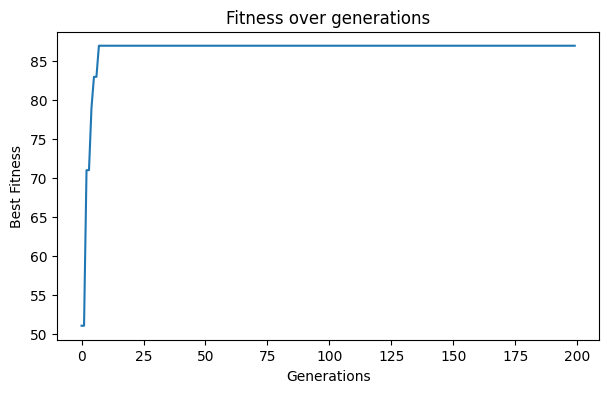

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(fitness_history)
plt.title('Fitness over generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

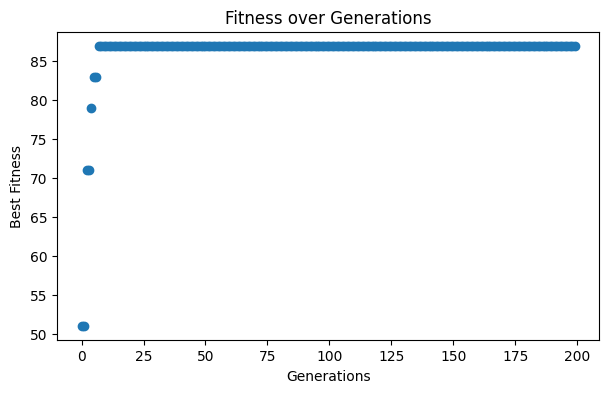

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.scatter(range(len(fitness_history)), fitness_history)
plt.title('Fitness over Generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()


- Fitness ổn định quá sớm
- Thiếu đa dạng trong quần thể
- Gaussian Mutation không hiệu quả